In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

df = pd.read_csv("./Step-5 Combined CSV/Speech_data.csv")
print(df.columns)
unique_values = df['Output'].unique()
df.shape

Index(['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10', 'Theta_TP9',
       'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9', 'Alpha_AF7',
       'Alpha_AF8', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7', 'Beta_AF8',
       'Beta_TP10', 'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8', 'Gamma_TP10',
       'Output'],
      dtype='object')


(39547, 21)

In [2]:
from sklearn.ensemble import ExtraTreesClassifier

# Extract features and target variable
X = df.drop('Output', axis=1)
y = df['Output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Extra Trees classifier
et_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the classifier
et_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = et_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

# Get the class labels
labels = sorted(y.unique())

# Print confusion matrix with labels
print("Confusion Matrix:")
print("    ", end="")
for label in labels:
    print(f"{label:^8}", end="")
print()
for i, label in enumerate(labels):
    print(f"{label:<4}", end="")
    for j in range(len(labels)):
        print(f"{conf_matrix[i][j]:^8}", end="")
    print()

Accuracy: 0.8466

Confusion Matrix:
[[ 999   17    2   32   19   30   16   13]
 [  13  854    1   13   15   38   15    7]
 [  14   49  494   21   21   52   27   24]
 [  34   15    0 1269   19   14   19    3]
 [   9   13    3   16  847   15    5    1]
 [  31   44   10   30   25  939   20    9]
 [  31   37    9   49   34   23  787    8]
 [  26   51   23   35   19   67   27  508]]

Classification Report:
              precision    recall  f1-score   support

      Doctor       0.86      0.89      0.87      1128
        Move       0.79      0.89      0.84       956
          No       0.91      0.70      0.79       702
        Pain       0.87      0.92      0.89      1373
      Silent       0.85      0.93      0.89       909
      Toilet       0.80      0.85      0.82      1108
       Water       0.86      0.80      0.83       978
         Yes       0.89      0.67      0.76       756

    accuracy                           0.85      7910
   macro avg       0.85      0.83      0.84      7910

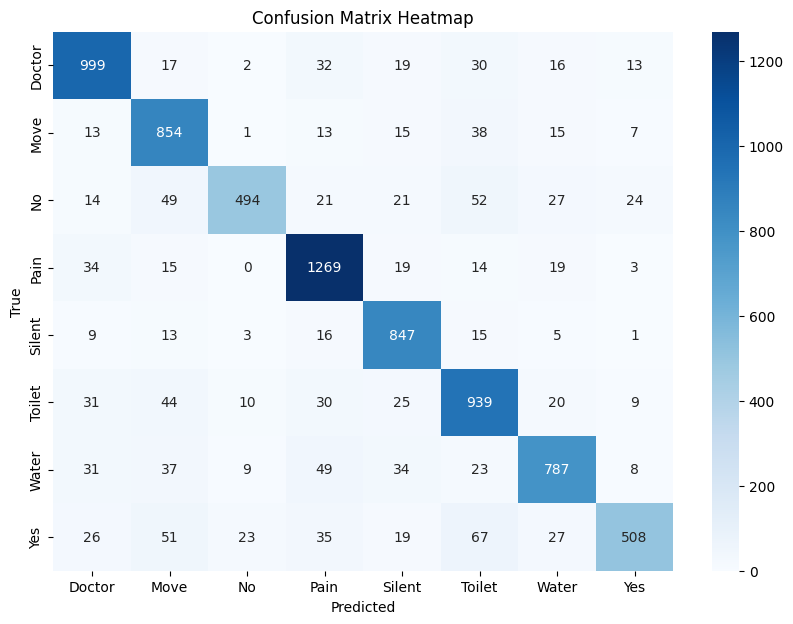

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [5]:
import numpy as np
from collections import Counter

new_data = pd.read_csv("sushant_new_water.csv")

new_data = new_data.iloc[15:-15]

# Reset index after removing rows
new_data.reset_index(drop=True, inplace=True)

new_data.dropna(inplace=True)

# Replace inf values with NaN
new_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows containing NaN values
new_data.dropna(axis=0, inplace=True)

# Make predictions on the new data
new_data_predictions = et_classifier.predict(new_data)

# Display the predictions
print('Predictions on New Data:')
print(new_data_predictions)
print(Counter(new_data_predictions))

Predictions on New Data:
['No' 'Move' 'Toilet' 'Toilet' 'Toilet' 'Doctor' 'Water' 'Doctor' 'Water'
 'Water' 'Doctor' 'Doctor' 'Doctor' 'Toilet' 'Doctor' 'Doctor' 'Water'
 'Water' 'Water' 'Doctor' 'No' 'Yes' 'Doctor' 'Water' 'Water' 'Doctor'
 'Toilet' 'No' 'Water' 'Water' 'Water' 'Water' 'Water' 'Toilet' 'Move'
 'Water' 'Doctor' 'Doctor' 'Water' 'Water' 'Water' 'Water' 'Water' 'Water'
 'Toilet' 'Toilet' 'Water' 'Pain' 'Doctor' 'Water' 'Water' 'Water' 'Water'
 'Water']
Counter({'Water': 26, 'Doctor': 13, 'Toilet': 8, 'No': 3, 'Move': 2, 'Yes': 1, 'Pain': 1})
